<a href="https://colab.research.google.com/github/akanksha0911/DL_BuildNN/blob/main/DLAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a simple fully connected deep network from scratch**
Akanksha Rawat

Non-linear equation with 3 variables - X1, X2, X3 below

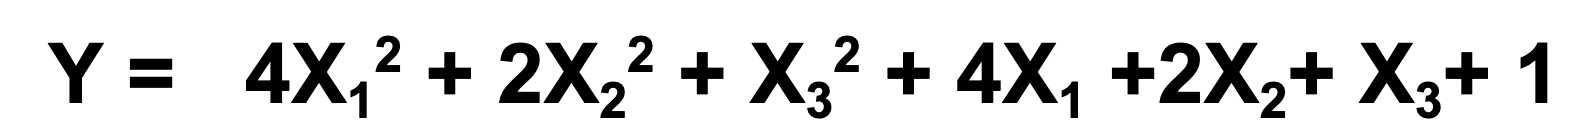

### **numpy only from scratch 3 layer deep neural network for non linear regression**




In [906]:
import numpy as np
import matplotlib.pyplot as plt

In [907]:
n = 300
d = 3
x = np.random.uniform(-1,1,(n,d))

weights = np.array([[4,2,1],]).T
bias = np.array([1])
y_true = (x ** 2) @weights + x @ weights + bias
print(f'x: {x.shape},weights: {weights.shape}, bias: {bias.shape}, y: {y_true.shape}')

x: (300, 3),weights: (3, 1), bias: (1,), y: (300, 1)


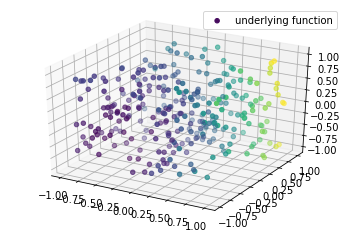

In [908]:
def plot_4d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = y, label='underlying function')
  if y_pred is not None:
    pic = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = y_pred, label='our function')
  plt.legend()
  plt.show()

plot_4d(x, y_true)

In [909]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Epoch 0, loss 22.354031207969314
Epoch 1, loss 16.86371815355659
Epoch 2, loss 13.088804339142252
Epoch 3, loss 10.446443683639943
Epoch 4, loss 8.559413243691706
Epoch 5, loss 7.182432951187772
Epoch 6, loss 6.155052441702114
Epoch 7, loss 5.371501790543384
Epoch 8, loss 4.761377648716551
Epoch 9, loss 4.277253228717644
Epoch 10, loss 3.8867151531001287
Epoch 11, loss 3.567232822548515
Epoch 12, loss 3.302841996216132
Epoch 13, loss 3.081991927735238
Epoch 14, loss 2.8961400885513853
Epoch 15, loss 2.738828354977681
Epoch 16, loss 2.605070236661667
Epoch 17, loss 2.490939869442593
Epoch 18, loss 2.3932925827224465
Epoch 19, loss 2.3095718553146583
Epoch 20, loss 2.2376734833977694
Epoch 21, loss 2.1758480476693545
Epoch 22, loss 2.1226293573038424
Epoch 23, loss 2.0767807895091854
Epoch 24, loss 2.03725418064847
Epoch 25, loss 2.0031576980556935
Epoch 26, loss 1.9737302759785087
Epoch 27, loss 1.9483209552679595
Epoch 28, loss 1.9263719658050673
Epoch 29, loss 1.9074047237561873
Epoch

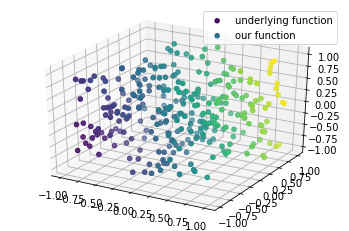

In [910]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, linear(x))

## we can see that loss is still high so our linear model is not capable of non-linearity 

In [911]:
 # In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


18.00321234833697


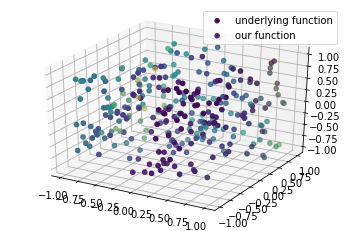

In [912]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 4)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_4d(x, y_true, y_pred)

In [913]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 4)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

20.431204726813235
7.586517901804185


Epoch 0, loss 7.586517901804185
Epoch 1, loss 2.3518399757941704
Epoch 2, loss 1.6347256694423102
Epoch 3, loss 1.3846100889148822
Epoch 4, loss 1.234341872233279
Epoch 5, loss 1.1397047667494682
Epoch 6, loss 1.0785399236555921
Epoch 7, loss 1.0368036695175915
Epoch 8, loss 1.007287341081214
Epoch 9, loss 0.9849857012482083
Epoch 10, loss 0.9624312244266555
Epoch 11, loss 0.9440182304991007
Epoch 12, loss 0.929502083233621
Epoch 13, loss 0.9184198080075036
Epoch 14, loss 0.9084486530779146
Epoch 15, loss 0.9012606004747359
Epoch 16, loss 0.896009293572266
Epoch 17, loss 0.892047321826401
Epoch 18, loss 0.8889994772230633
Epoch 19, loss 0.886574303602007
Epoch 20, loss 0.8845565429494566
Epoch 21, loss 0.8828430771501659
Epoch 22, loss 0.8813481326368947
Epoch 23, loss 0.8800280635118561
Epoch 24, loss 0.878811562358569
Epoch 25, loss 0.8776765792627746
Epoch 26, loss 0.8766106494965668
Epoch 27, loss 0.8756141920584601
Epoch 28, loss 0.8746465778964976
Epoch 29, loss 0.873726101489356

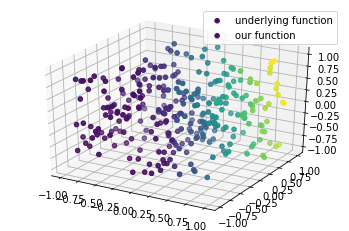

In [914]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, model(x))

### So  we can see that the loss is decreasing and getting close to 0.

### **pytorch from scratch - 3 layer deep neural network for non linear regression**

In [915]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2



In [916]:

loss = nn.MSELoss()
model = TorchModel(d, 4)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(24.7781, grad_fn=<MseLossBackward0>)


In [917]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(24.7781, grad_fn=<MseLossBackward0>)
tensor(16.8397, grad_fn=<MseLossBackward0>)


tensor(16.8397, grad_fn=<MseLossBackward0>)
tensor(13.4565, grad_fn=<MseLossBackward0>)
tensor(10.7445, grad_fn=<MseLossBackward0>)
tensor(8.3423, grad_fn=<MseLossBackward0>)
tensor(6.2969, grad_fn=<MseLossBackward0>)
tensor(4.7789, grad_fn=<MseLossBackward0>)
tensor(3.7313, grad_fn=<MseLossBackward0>)
tensor(3.0168, grad_fn=<MseLossBackward0>)
tensor(2.4859, grad_fn=<MseLossBackward0>)
tensor(2.0613, grad_fn=<MseLossBackward0>)
tensor(1.7443, grad_fn=<MseLossBackward0>)
tensor(1.5192, grad_fn=<MseLossBackward0>)
tensor(1.3553, grad_fn=<MseLossBackward0>)
tensor(1.2256, grad_fn=<MseLossBackward0>)
tensor(1.1276, grad_fn=<MseLossBackward0>)
tensor(1.0525, grad_fn=<MseLossBackward0>)
tensor(0.9984, grad_fn=<MseLossBackward0>)
tensor(0.9590, grad_fn=<MseLossBackward0>)
tensor(0.9305, grad_fn=<MseLossBackward0>)
tensor(0.9095, grad_fn=<MseLossBackward0>)
tensor(0.8935, grad_fn=<MseLossBackward0>)
tensor(0.8813, grad_fn=<MseLossBackward0>)
tensor(0.8717, grad_fn=<MseLossBackward0>)
tensor(0

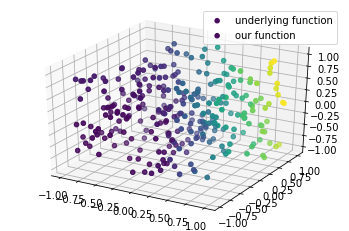

In [918]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, model(x_tensor).detach())

## **Using pytorch builtin functionality of modules**

In [919]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [920]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [921]:
# Hyperparameters for our network

# Build a feed-forward network
model = nn.Sequential(nn.Linear(3, 10),
                      nn.ReLU(),
                      nn.Linear(10, 1),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Softmax(dim=1)
)


In [853]:
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()

logits = model(x_tensor)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

loss_value = loss(y_pred, y_true_tensor)
print(loss_value)

tensor(19.3155)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## **pytorch lightening version of the same**

In [854]:
%%capture
! pip install git+https://github.com/PytorchLightning/pytorch-lightning.git@master --upgrade

In [855]:
x_train = x[: n // 2]
x_test = x[n // 2 :]
y_train = y_true[: n // 2]
y_test = y_true[n // 2 :]

In [856]:
from torch.utils.data import TensorDataset, DataLoader

x_train_t = torch.Tensor(x_train[:, np.newaxis])
y_train_t = torch.Tensor(y_train[:, np.newaxis])
x_test_t = torch.Tensor(x_test[:, np.newaxis])
y_test_t = torch.Tensor(y_test[:, np.newaxis])

dataset_train = TensorDataset(x_train_t, y_train_t)
dataloader_train = DataLoader(dataset_train, batch_size=64, shuffle=True)
dataset_test = TensorDataset(x_test_t, y_test_t)
dataloader_test = DataLoader(dataset_test, batch_size=64, shuffle=True)

In [857]:
def loss_fn_loglike(y_hat, y):
    negloglik = -y_hat.log_prob(y)
    return torch.mean(negloglik)


def plot_loss(loss_train, loss_test):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(np.array(loss_train), label="Train loss")
    ax.plot(np.array(loss_test), label="Test loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("NegLogLike")
    ax.set_title("Training Overview")
    ax.legend()

    plt.show()


def plot_results(x, y, y_est_mu, y_est_std=None):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, ".", label="y")
    plt.plot(x, y_est_mu, "-y", label="y_est_mu")
    if y_est_std is not None:
        plt.plot(x, y_est_mu + 2 * y_est_std, "-r", label="mu+2std")
        plt.plot(x, y_est_mu - 2 * y_est_std, "-r", label="mu-2std")
    plt.legend()
    plt.show()


def plot_model_results(model, x, y):
    si = np.argsort(x)
    x = x[si]
    y = y[si]
    y_hat = model(torch.Tensor(x[:, np.newaxis]))
    y_est_mu = y_hat.mean.detach().numpy()
    y_est_std = y_hat.scale.detach().numpy()
    plot_results(x, y, y_est_mu, y_est_std)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:97: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=20)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1796: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator

Training: 0it [00:00, ?it/s]

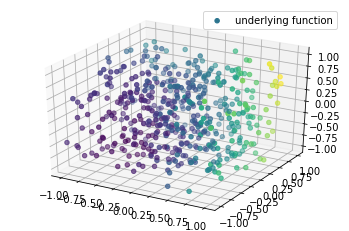

In [858]:
import pytorch_lightning as pl

class DeepNormalModelPL(pl.LightningModule):
    def __init__(self, n_inputs: int = 3, n_hidden: int = 10, learning_rate=0.05):
        super().__init__()

        self.learning_rate = learning_rate
        self.hidden = torch.nn.Linear(n_inputs, n_hidden)
        self.mean_linear = torch.nn.Linear(n_hidden, 1)
        self.scale_linear = torch.nn.Linear(n_hidden, 1)

    def forward(self, x):
        outputs = self.hidden(x)
        # outputs = torch.relu(outputs)
        outputs = torch.sigmoid(outputs)

        mean = self.mean_linear(outputs)
        scale = torch.nn.functional.softplus(self.scale_linear(outputs))

        return torch.distributions.Normal(mean, scale)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = loss_fn_loglike(y_hat, y)
        return loss


model_lightning = DeepNormalModelPL()
trainer = pl.Trainer(max_epochs=40, progress_bar_refresh_rate=20)
trainer.fit(model_lightning, dataloader_train, dataloader_test)
y_hat = model_lightning(torch.Tensor(x[:, np.newaxis]))
plot_4d(x_train, y_train)
#plot_model_results(model_lightning, x_train, y_train)

## **Tensorflow various variants**

## 1. High Level API

In [922]:
import tensorflow as tf
from tensorflow import keras

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 regression (Dense)          (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 3.6438
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7955
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6037
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4497
Epoch

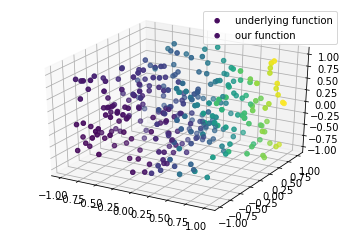

In [923]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(3,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_4d(x, y_true, model(x))

## Low Level API

Creating layers by subclassing the Layer class

Computing gradients with a GradientTape and writing low-level training loops

Tracking losses created by layers via the add_loss() method

Tracking metrics in a low-level training loop

Speeding up execution with a compiled tf.function

Executing layers in training or inference mode

In [924]:
#A simple layer looks like this

class Linear(keras.layers.Layer):
  """y = w.x + b"""

  def __init__(self, units=10, input_dim=3):
      super(Linear, self).__init__()
      w_init = tf.random_normal_initializer()
      self.w = tf.Variable(
          initial_value=w_init(shape=(input_dim, units), dtype='float32'),
          trainable=True)
      b_init = tf.zeros_initializer()
      self.b = tf.Variable(
          initial_value=b_init(shape=(units,), dtype='float32'),
          trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

In [925]:
# Instantiate our layer.
linear_layer = Linear(units=10, input_dim=3)

# The layer can be treated as a function.
# Here we call it on some data.
y = linear_layer(x)
y.shape


TensorShape([300, 10])

creating add_weight method for creating weights

In [926]:
class Linear(keras.layers.Layer):
  """y = w.x + b"""

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(10)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(x)


In [927]:
x.shape

(300, 3)

In [928]:

dataset = tf.data.Dataset.from_tensor_slices(
    (x, y_true))
dataset = dataset.shuffle(buffer_size=100).batch(64)

In [929]:
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [930]:
# Instantiate our linear layer (defined above) with 10 units.
linear_layer = Linear(10)

# Instantiate a logistic loss function that expects integer targets.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):
  
  # Open a GradientTape.
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = linear_layer(x)

    # Loss value for this batch.
    loss = loss_fn(y, logits)
     
  # Get gradients of weights wrt the loss.
  gradients = tape.gradient(loss, linear_layer.trainable_weights)
  
  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, linear_layer.trainable_weights))
  
  # Logging.
  if step % 100 == 0:
    print('Step:', step, 'Loss:', float(loss))


Step: 0 Loss: nan


In [931]:
class MLP(keras.layers.Layer):
    """Simple stack of Linear layers."""
    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(10)
        self.linear_2 = Linear(1)
        

    def call(self, inputs):
        l1 = self.linear_1(inputs)
        r = tf.nn.relu(x)
        l2 = self.linear_2(x)
        return l2


mlp = MLP()

# The first call to the `mlp` object will create the weights.
y_pred = mlp(x)

above created manual class is equivalent to 

mlp = keras.Sequential([keras.layers.Dense(32, activation=tf.nn.relu),
                        keras.layers.Dense(10)])


---



Layers can create losses during the forward pass via the add_loss() method. This is especially useful for regularization losses. The losses created by sublayers are recursively tracked by the parent layers.

Here's a layer that creates an activity regularization loss:

In [932]:
class ActivityRegularization(keras.layers.Layer):
  """Layer that creates an activity sparsity regularization loss."""
  
  def __init__(self, rate=1e-2):
    super(ActivityRegularization, self).__init__()
    self.rate = rate
  
  def call(self, inputs):
    # We use `add_loss` to create a regularization loss
    # that depends on the inputs.
    self.add_loss(self.rate * tf.reduce_sum(inputs))
    return inputs

In [933]:
# Let's use the loss layer in a MLP block.

class SparseMLP(keras.layers.Layer):
  """Stack of Linear layers with a sparsity regularization loss."""

  def __init__(self):
      super(SparseMLP, self).__init__()
      self.linear_1 = Linear(10)
      self.regularization = ActivityRegularization(1e-2)
      self.linear_3 = Linear(1)

  def call(self, inputs):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.regularization(x)
      return self.linear_3(x)
    

mlp = SparseMLP()
y_pred = mlp(x)

print(mlp.losses)  # List containing one float32 scalar

[<tf.Tensor: shape=(), dtype=float32, numpy=0.07709072>]


In [934]:
# A new MLP.
mlp = SparseMLP()

# Loss and optimizer.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

In [935]:
for step, (x, y) in enumerate(dataset):
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = mlp(x)

    # External loss value for this batch.
    loss = loss_fn(y, logits)
    
    # Add the losses created during the forward pass.
    loss += sum(mlp.losses)
     
    # Get gradients of weights wrt the loss.
    gradients = tape.gradient(loss, mlp.trainable_weights)
  
  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, mlp.trainable_weights))
  
  # Logging.
  if step % 100 == 0:
    print('Step:', step, 'Loss:', float(loss))

Step: 0 Loss: nan


In [936]:
# Instantiate a metric object
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()


# Prepare our layer, loss, and optimizer.
model = keras.Sequential([keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(1)])
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

for epoch in range(2):
    # Iterate over the batches of a dataset.
    for step, (x, y) in enumerate(dataset):
        with tf.GradientTape() as tape:
            logits = model(x)
            # Compute the loss value for this batch.
            loss_value = loss_fn(y, logits)

        # Update the state of the `accuracy` metric.
        accuracy.update_state(y, logits)

        # Update the weights of the model to minimize the loss value.
        gradients = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))

        # Logging the current accuracy value so far.
        if step % 100 == 0:
            print('Epoch:', epoch, 'Step:', step)        
            print('Total running accuracy so far: %.3f' % accuracy.result())

    # Result the metric's state at the end of an epoch
    accuracy.reset_states()

Epoch: 0 Step: 0
Total running accuracy so far: 0.000
Epoch: 1 Step: 0
Total running accuracy so far: 0.000


## **Using built-in training loops**

In [937]:
x

<tf.Tensor: shape=(44, 3), dtype=float64, numpy=
array([[-0.90687151,  0.33194353, -0.49266623],
       [ 0.59305844, -0.30554725,  0.52144706],
       [ 0.99819698,  0.29101516, -0.25791531],
       [ 0.52562762, -0.17808033,  0.01659558],
       [-0.09675526,  0.04663414, -0.92686949],
       [-0.52859669, -0.97444763, -0.54843069],
       [ 0.59077503,  0.33090633, -0.35568281],
       [-0.26875389,  0.15605525,  0.59964736],
       [-0.07814234, -0.89505929,  0.79983492],
       [ 0.63956558,  0.08693118,  0.67861299],
       [ 0.02943976,  0.58290123, -0.54220806],
       [-0.9042703 , -0.75195865,  0.40444172],
       [-0.94474843,  0.2596181 ,  0.57186189],
       [-0.8755919 , -0.19196196,  0.16053018],
       [ 0.1325939 ,  0.95883583,  0.39294161],
       [ 0.26730566,  0.82173698,  0.63542387],
       [ 0.00672303,  0.59266903, -0.8975129 ],
       [-0.12749886, -0.06945795, -0.17790022],
       [ 0.92367227, -0.41108928, -0.34135742],
       [ 0.71773315, -0.39061232,  0.19

In [938]:


# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(10, activation=tf.nn.relu),
  layers.Dense(1)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [939]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [940]:
model.fit(dataset, epochs=3)

Epoch 1/3
5/5 [==============================] - 0s 6ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/3
5/5 [==============================] - 0s 5ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/3
5/5 [==============================] - 0s 4ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00


In [941]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(10, activation=tf.nn.relu),
  layers.Dense(1)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

# Instantiate some callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(),
             tf.keras.callbacks.ModelCheckpoint(filepath='my_model.keras',
                                                save_best_only=True)]

model.fit(x, y,
          epochs=3,
          batch_size=64,
          callbacks=callbacks)

Epoch 1/3
1/1 [==============================] - 0s 423ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 18ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 19ms/step - loss: nan - sparse_categorical_accuracy: 0.0000e+00


Callbacks

A callback is an object that is called at different points during training (e.g. at the end of every batch or at the end of every epoch) and takes actions, such as saving a model, mutating variables on the model, loading a checkpoint, stopping training, etc.

There's a bunch of built-in callback available, like ModelCheckpoint to save your models after each epoch during training, or EarlyStopping, which interrupts training when your validation metrics start stalling.